# 1. 필요한 package 불러오기

In [61]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
from collections import Counter

# 2. run하기
---
내가 원하는 동작들
- json file을 순차적으로 불러와서
- num_followers, num_tracks, num_albums, collabroative 에 대한 통계를 작성하고 시각화함

### 변수 선언

In [24]:
list_n_tracks = []
list_n_albums = []
list_n_followers = []
list_collabo = []

dict_track = {}
dict_album = {}
dict_follower = {}
dict_collabo = {}

### RUN
- 6-7 분정도 걸림

In [25]:
data_dir = './data/spotify_million_playlist/data'
json_list = os.listdir(data_dir)

for i,json_file in enumerate(tqdm(json_list,desc='Now on running...')):
    with open(data_dir +'/'+json_file, 'r') as f:
        json_data = json.load(f)['playlists']
    for playlist in range(len(json_data)):
        info = json_data[playlist]
        list_n_tracks.append(info['num_tracks'])
        list_n_albums.append(info['num_albums'])
        list_n_followers.append(info['num_followers'])
        list_collabo.append(info['collaborative'])
    dict_track = Counter(dict_track) + Counter(list_n_tracks)
    dict_album = Counter(dict_album) + Counter(list_n_albums)
    dict_follower = Counter(dict_follower) + Counter(list_n_followers)
    dict_collabo = Counter(dict_collabo) + Counter(list_collabo)
    list_n_tracks = []
    list_n_albums = []
    list_n_followers = []
    list_collabo = []
    

Now on running...: 100%|██████████| 1000/1000 [06:04<00:00,  2.75it/s]


# 3. 시각화

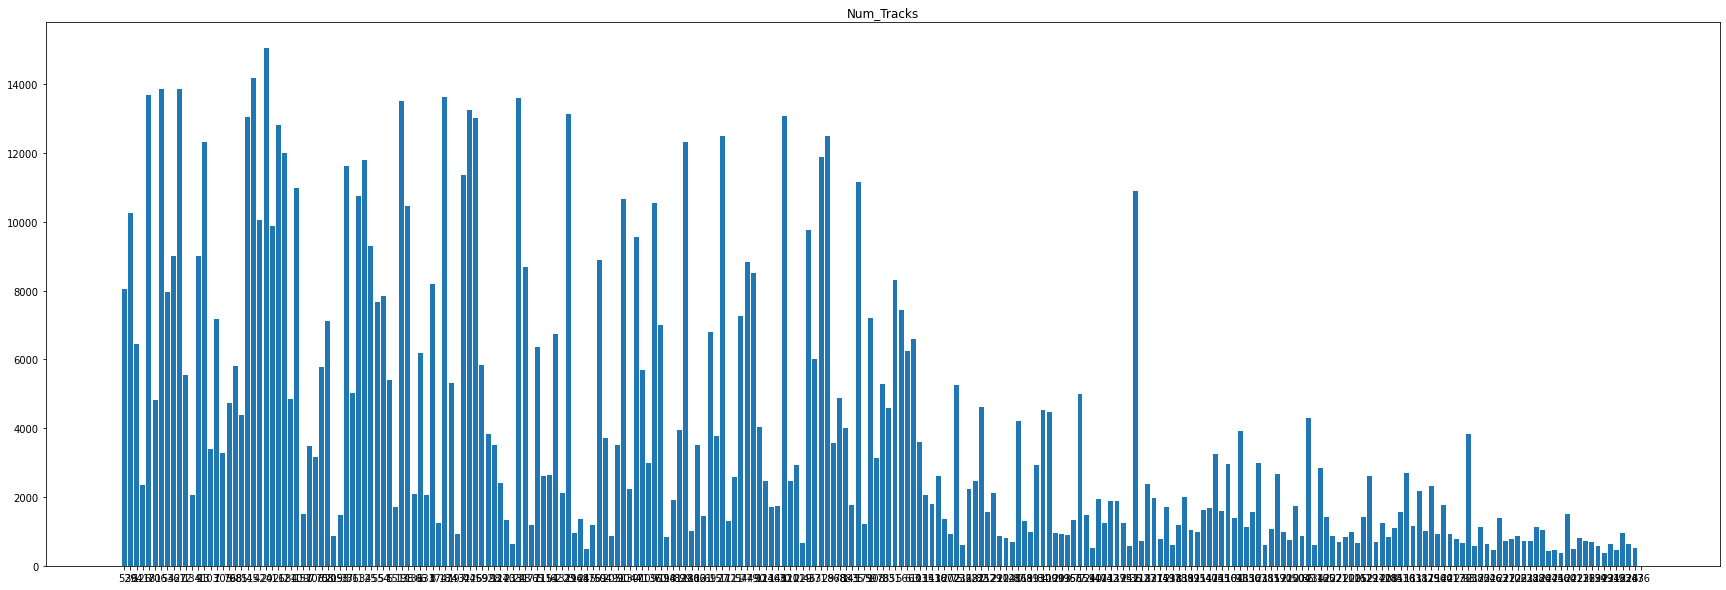

In [33]:
plt.figure(figsize=(30,10))
plt.bar(range(len(dict(dict_track))), list(dict(dict_track).values()), align='center')
plt.xticks(range(len(dict(dict_track))), list(dict(dict_track).keys()))
plt.title('Num_Tracks')
plt.show()

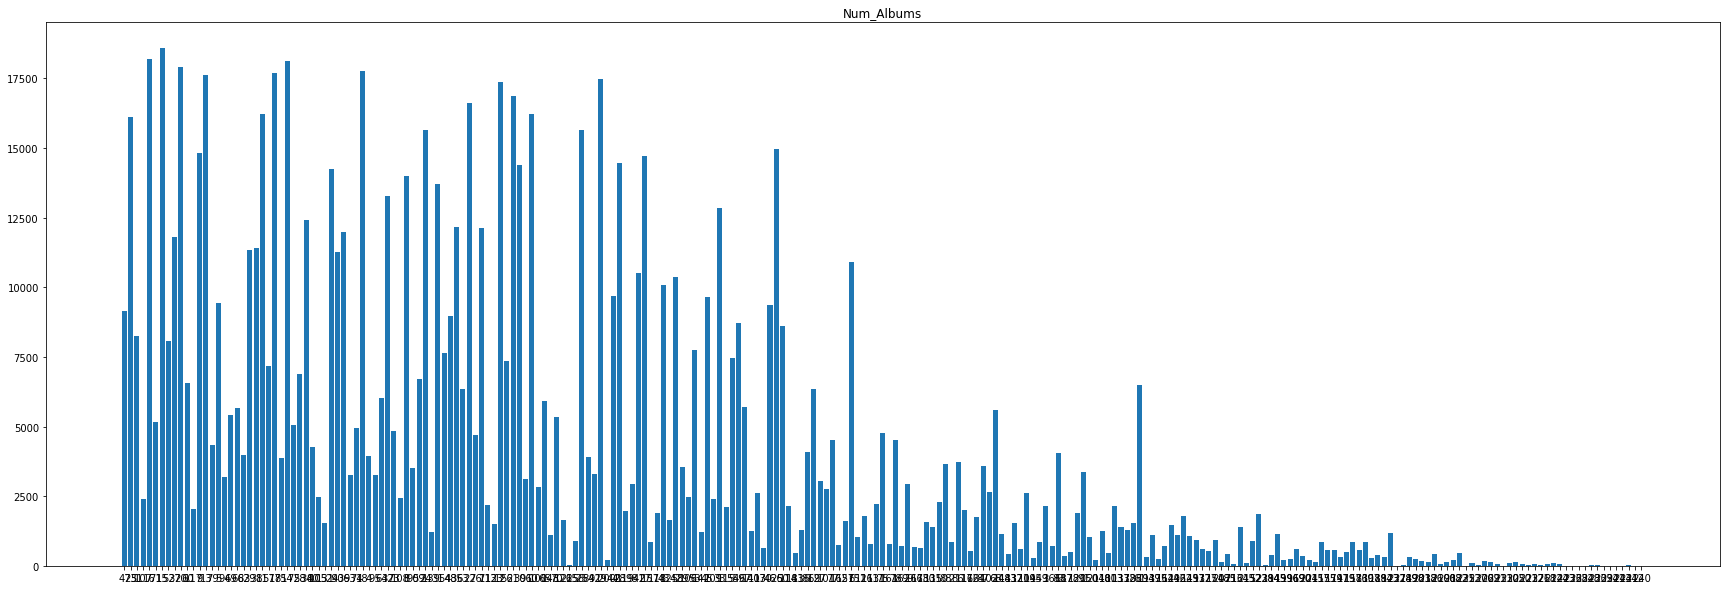

In [34]:
plt.figure(figsize=(30,10))
plt.bar(range(len(dict(dict_album))), list(dict(dict_album).values()), align='center')
plt.xticks(range(len(dict(dict_album))), list(dict(dict_album).keys()))
plt.title('Num_Albums')
plt.show()

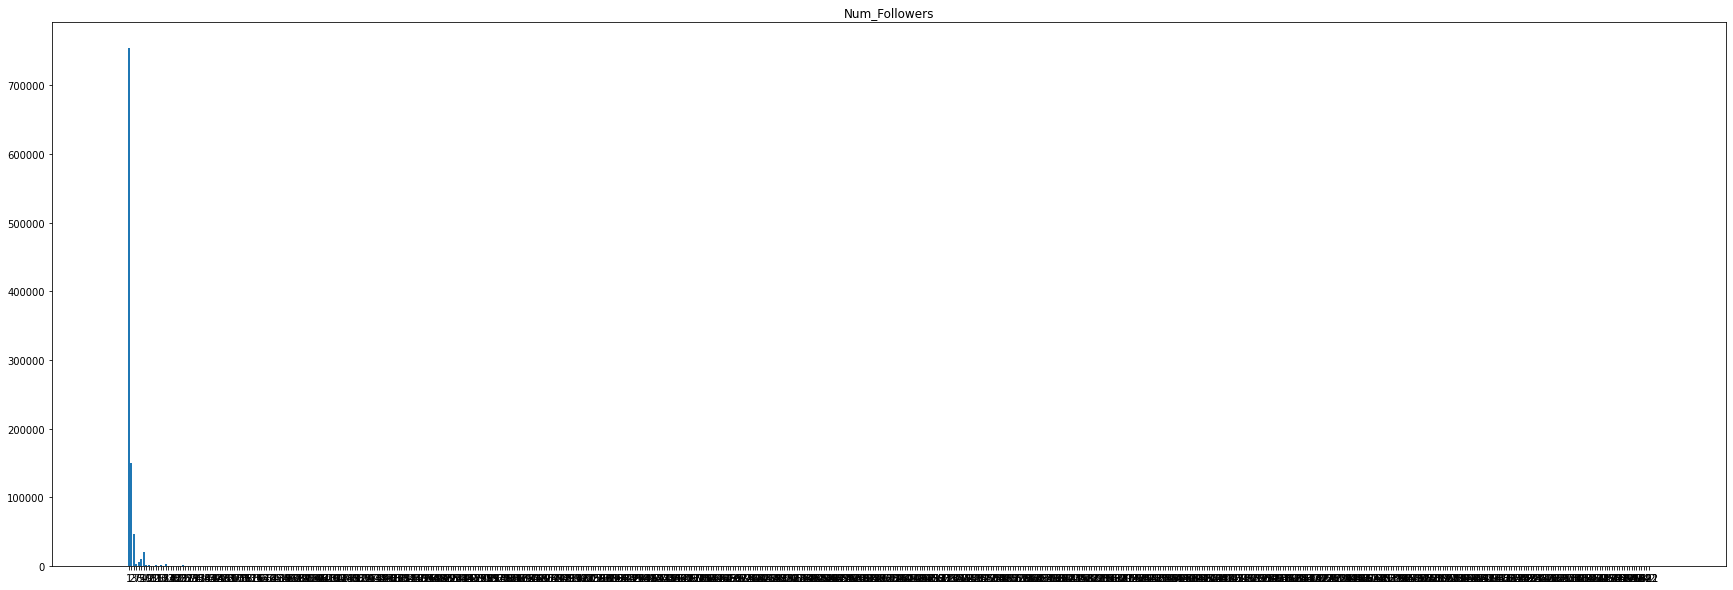

In [35]:
plt.figure(figsize=(30,10))
plt.bar(range(len(dict(dict_follower))), list(dict(dict_follower).values()), align='center')
plt.xticks(range(len(dict(dict_follower))), list(dict(dict_follower).keys()))
plt.title('Num_Followers')
plt.show()

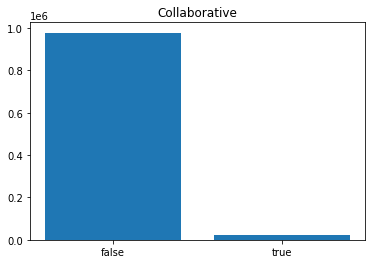

In [30]:
plt.bar(range(len(dict(dict_collabo))), list(dict(dict_collabo).values()), align='center')
plt.xticks(range(len(dict(dict_collabo))), list(dict(dict_collabo).keys()))
plt.title('Collaborative')
plt.show()

In [41]:
dict(dict_collabo)

{'false': 977431, 'true': 22569}

### Save

In [40]:
dir = './data/spotify_million_playlist'
os.chdir(dir)

with open('track.json', 'w') as fp:
    json.dump(dict(dict_track), fp)

with open('album.json', 'w') as fp:
    json.dump(dict(dict_album), fp)

with open('follower.json', 'w') as fp:
    json.dump(dict(dict_follower), fp)

with open('collaborative.json', 'w') as fp:
    json.dump(dict(dict_collabo), fp)

# 4. 정량분석

In [43]:
# 불러오기
import json

path = './data/spotify_million_playlist/'

with open(path+'track.json', 'r') as f:
    dict_track = json.load(f)
with open(path+'album.json', 'r') as f:
    dict_album = json.load(f)
with open(path+'follower.json', 'r') as f:
    dict_follower = json.load(f)
with open(path+'collaborative.json', 'r') as f:
    dict_collabo = json.load(f)

In [44]:
dict_follower = {int(k):int(v) for k,v in dict_follower.items()} # key를 정수형으로
dict_follower = dict(sorted(dict_follower.items())) # key(follower의 수)를 기준으로 정렬

In [45]:
sum(list(dict_follower.values())[100:]) # 100명 이상의 follower를 가진 playlist의 수

816

In [57]:
list(dict_follower.keys())[-1:99:-1] # 100명 이상의 follower를 가진 playlist들

[71643,
 53519,
 45942,
 31539,
 27830,
 23500,
 22102,
 15842,
 15123,
 14812,
 12862,
 12604,
 11772,
 11745,
 11618,
 11111,
 10911,
 9887,
 9821,
 9345,
 9188,
 9142,
 8596,
 7973,
 7912,
 7394,
 7177,
 6918,
 6611,
 6568,
 6421,
 6398,
 6337,
 6326,
 5822,
 5787,
 5282,
 5219,
 5164,
 5021,
 4657,
 4455,
 4427,
 4323,
 4238,
 4202,
 4097,
 3934,
 3738,
 3638,
 3596,
 3512,
 3498,
 3437,
 3286,
 3266,
 3197,
 3182,
 3165,
 3136,
 3117,
 3000,
 2994,
 2981,
 2971,
 2887,
 2719,
 2699,
 2671,
 2658,
 2618,
 2593,
 2545,
 2510,
 2509,
 2490,
 2471,
 2467,
 2398,
 2342,
 2341,
 2323,
 2322,
 2286,
 2259,
 2245,
 2216,
 2186,
 2182,
 2141,
 2122,
 2088,
 2074,
 2016,
 2008,
 2004,
 2002,
 1995,
 1994,
 1980,
 1975,
 1916,
 1858,
 1823,
 1817,
 1813,
 1810,
 1806,
 1781,
 1744,
 1731,
 1669,
 1651,
 1644,
 1640,
 1627,
 1624,
 1621,
 1612,
 1589,
 1585,
 1561,
 1559,
 1527,
 1525,
 1497,
 1483,
 1474,
 1472,
 1470,
 1450,
 1444,
 1439,
 1413,
 1403,
 1401,
 1363,
 1360,
 1311,
 1308,
 13

# 5. 적절한 Playlist 뽑기
## 5.1 100명 이상의 follower를 가진 playlist가 얼마의 track을 가지는가?
- 100만개의 playlist를 돌며
- 100명 이상의 follower가 있는 track은 몇 개의 track을 가지는지
- df에 playlist | follower | track 순으로 저장한다


In [67]:
playlist = []
follower = []
track = []

list

In [68]:
data_dir = './data/spotify_million_playlist/data'
json_list = os.listdir(data_dir)

for i,json_file in enumerate(tqdm(json_list,desc='Now on running...')):
    with open(data_dir +'/'+json_file, 'r') as f:
        json_data = json.load(f)['playlists']
    for playlist_ in range(len(json_data)):
        info = json_data[playlist_]
        num_followers = info['num_followers']
        if num_followers >= 100:
            playlist.append(info['pid'])
            follower.append(num_followers)
            track.append(info['num_tracks'])

playlist_dic = {'playlist':playlist,
                'follower':follower,
                'track':track
                }
df = pd.DataFrame(playlist_dic)
df.to_csv('./data/spotify_million_playlist/follower100이상.csv', encoding='', index=False)

Now on running...: 100%|██████████| 1000/1000 [06:13<00:00,  2.68it/s]


In [73]:
num_tracks = df['track'].values

In [85]:
print(f'평균 : {num_tracks.mean()}')
print(f'중앙값 : {np.median(num_tracks)}')
print(f'최소: {np.min(num_tracks)}')
print(f'최대 : {np.max(num_tracks)}')
print(f'분산 : {np.var(num_tracks)}')
print(f'표준편차 : {np.std(num_tracks)}')
print(f'25quantile : {np.quantile(num_tracks,0.25)}')
print(f'75quantile : {np.quantile(num_tracks,0.75)}')


평균 : 84.48175182481752
중앙값 : 64.0
최소: 5
최대 : 248
분산 : 4217.198572113591
표준편차 : 64.93996128820521
25quantile : 30.0
75quantile : 126.0


In [102]:
# 25에서 75 quantile 사이에 있는 track의 수
len(num_tracks) - len(num_tracks[num_tracks<30]) - len(num_tracks[num_tracks>126])

416

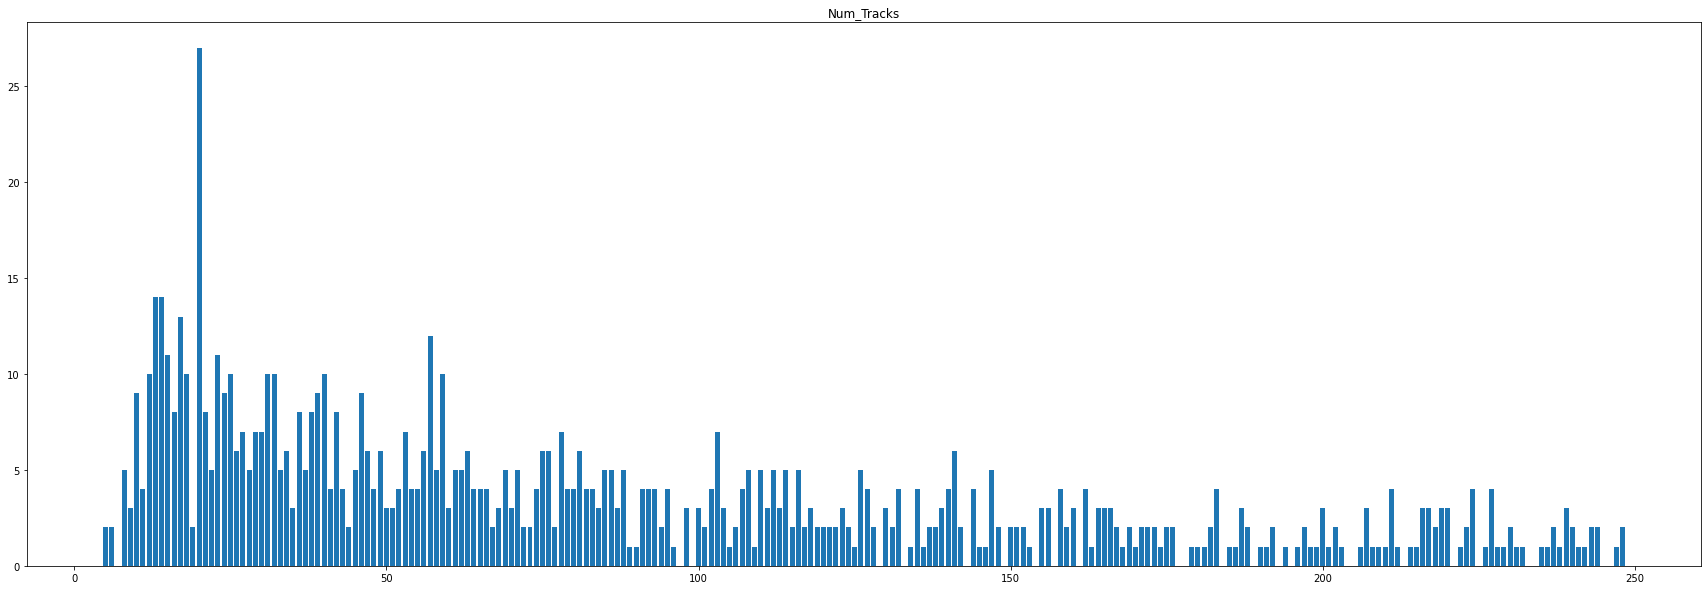

In [91]:
plt.figure(figsize=(30,10))
# plt.bar(range(len(num_tracks)), list(num_tracks), align='center')
plt.bar(Counter(num_tracks).keys(), Counter(num_tracks).values(),align='center')
plt.title('Num_Tracks')
plt.show()

## 5.2 Youtube 링크 추출위한 준비
- df를 만든다
- df는 pid | artist_name | track_name | url 으로 구성된다
- follower가 100이 넘고 track의 수가 25-75 quantile안에 드는 playlist만 추가한다

In [136]:
data_dir = './data/spotify_million_playlist/data/'

title = 'mpd.slice.'
df_url = pd.DataFrame(data={'pid':[],
                            'artist_name':[],
                            'track_name':[],
                            'url':[]})
for idx,item in tqdm(df.iterrows()):
    pid, _, track = item
    if track>=30 & track<=126:
        file_num = int((pid//1000)*1000)
        target = data_dir+title+str(file_num)+'-'+str(file_num+999)+'.json'
        with open(target, 'r') as f:
            json_data = json.load(f)['playlists']
        for playlist in range(len(json_data)):
            info = json_data[playlist]
            if info['pid'] == pid:
                for i in range(len(info['tracks'])):
                    track = info['tracks'][i]
                    df_url = df_url.append({'pid' : int(pid) , 
                                            'artist_name' : track['artist_name'], 
                                            'track_name' : track['track_name']} , ignore_index=True)
        
df_url.to_csv('./data/spotify_million_playlist/url.csv',index=False)

822it [07:13,  1.90it/s]
